In [1]:
from BOVW import BOVW
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay
import pickle, dill

In [2]:
path = "../../../dataset/train/"
path_test = "../../../dataset/test/"
test_images_path = list(Path(path_test).rglob(f"*.jpg"))

In [3]:
bovw = BOVW(num_cluster=100, step_size=25)

In [4]:
train_hist, labels, train_paths = bovw.create_train_Vocabulary(path, "jpg", "./bovw")

Extracting SIFT from image ..\..\..\dataset\prova\unsavory\0050.jpg...: 100%|██████████| 76/76 [00:05<00:00, 14.70it/s]


Visual words computed in: 20.6713417
BOVW computed in: 0.161188199999998


Normalized Histogram - Training Accuracy: 0.9473684210526315


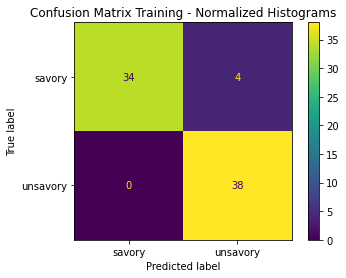

In [5]:
print(f"Normalized Histogram - Training Accuracy: {np.mean(bovw.model.predict(train_hist) == labels)}")
ConfusionMatrixDisplay.from_estimator(bovw.model, train_hist, labels)
plt.title("Confusion Matrix Training - Normalized Histograms")
plt.show()

## Load after training for test phase

In [3]:
bovw = BOVW.load_model('./bovw/bovw.pkl')

Extracting SIFT from image ..\..\..\dataset\prova_test\unsavory\099.jpg...: 100%|██████████| 100/100 [00:05<00:00, 19.63it/s]


BOVW computed in: 0.1796460000000195
Normalized Histogram - Test Accuracy: 0.64


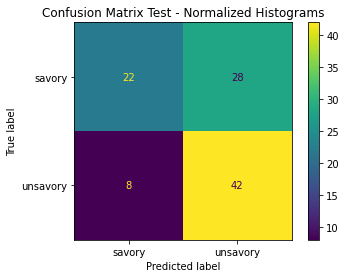

In [6]:
descr_test, labels_test, test_path = bovw.extract_Sifts(path_test, 'jpg')
histogram_test = bovw.compute_histogram(descr_test, labels_test)
predictions =  [i for i in bovw.model.predict(histogram_test)]

print(f"Normalized Histogram - Test Accuracy: {np.mean(bovw.model.predict(histogram_test) == labels_test)}")

ConfusionMatrixDisplay.from_estimator(bovw.model, histogram_test, labels_test)
plt.title("Confusion Matrix Test - Normalized Histograms")
plt.show()

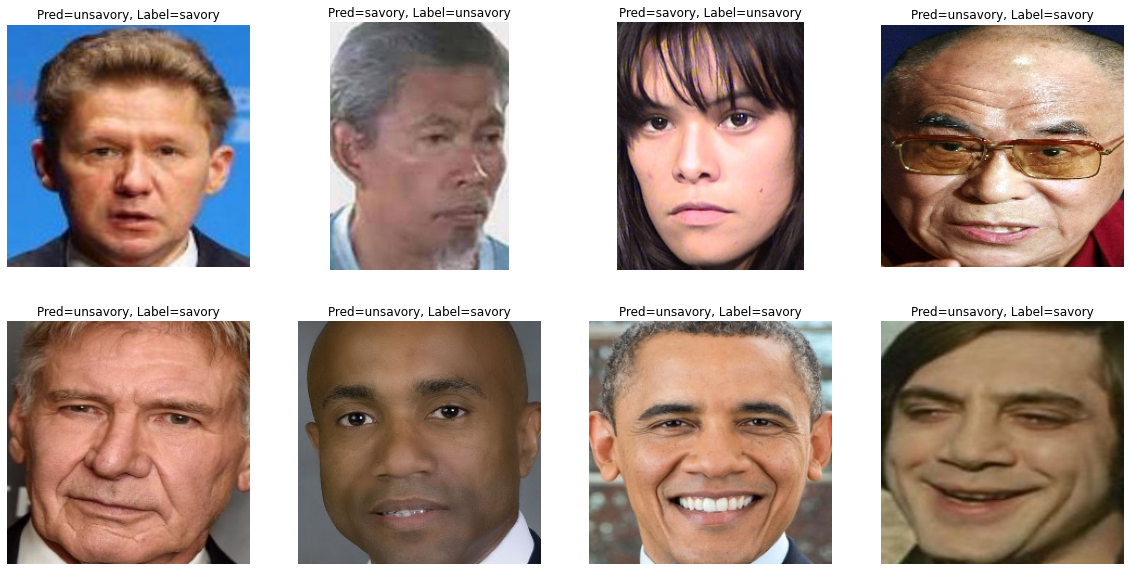

In [5]:
BOVW.show_results(bovw.model, histogram_test, labels_test, test_images_path, show_positive=False)

## CBIR from 0

In [3]:
for p in test_images_path:
    pred, k_similar = BOVW.cbir('./bovw/bovw.pkl', p, './bovw/train_bovw.pkl', './bovw/train_paths.pkl')
    print(pred)
    print(k_similar)
    break

BOVW computed in: 0.0018878999999998314
KDTree computed in: 0.0005759999999987997
10 most similar found in: 0.00046369999999917866
['savory']
['..\\..\\..\\dataset\\prova\\savory\\0025.jpg', '..\\..\\..\\dataset\\prova\\savory\\0038.jpg', '..\\..\\..\\dataset\\prova\\savory\\0015.jpg', '..\\..\\..\\dataset\\prova\\unsavory\\0027.jpg', '..\\..\\..\\dataset\\prova\\unsavory\\0049.jpg', '..\\..\\..\\dataset\\prova\\unsavory\\0022.jpg', '..\\..\\..\\dataset\\prova\\unsavory\\0033.jpg', '..\\..\\..\\dataset\\prova\\unsavory\\0048.jpg', '..\\..\\..\\dataset\\prova\\savory\\0036.jpg', '..\\..\\..\\dataset\\prova\\unsavory\\0037.jpg']
